# Homework 3: Unsupervised Learning

Due Wednesday 11/24 at 11:59 pm EST

In this notebook, we will be applying unsupervised learning approaches to a problem in computational biology. Specifically, we will be analyzing single-cell genomic sequencing data. Single-cell genomics is a set of revolutionary new technologies which can profile the genome of a specimen (tissue, blood, etc.) at the resolution of individual cells. This increased granularity can help capture intercellular heterogeneity, key to better understanding and treating complex genetic diseases such as cancer and Alzheimer's. 

<img src="https://cdn.10xgenomics.com/image/upload/v1574196658/blog/singlecell-v.-bulk-image.png" width="800px"/>

<center>Source: 10xgenomics.com/blog/single-cell-rna-seq-an-introductory-overview-and-tools-for-getting-started</center>

A common challenge of genomic datasets is their high-dimensionality: a single observation (a cell, in the case of single-cell data) may have tens of thousands of gene expression features. Fortunately, biology offers a lot of structure - different genes work together in pathways and are co-regulated by gene regulatory networks. Unsupervised learning is widely used to discover this intrinsic structure and prepare the data for further analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Dataset: single-cell RNASeq of mouse brain cells

We will be working with a single-cell RNASeq dataset of mouse brain cells. In the following gene expression matrix, each row represents a cell and each column represents a gene. Each entry in the matrix is a normalized gene expression count - a higher value means that the gene is expressed more in that cell. The dataset has been pre-processed using various quality control and normalization methods for single-cell data. 

Data source: https://chanzuckerberg.github.io/scRNA-python-workshop/preprocessing/00-tabula-muris.html

In [2]:
cell_gene_counts_df = pd.read_csv('data/mouse_brain_cells_gene_counts.csv', index_col='cell')
cell_gene_counts_df

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,-0.08093,0.7856,1.334,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.567
A1.B003728.3_56_F.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.8350,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,-0.681
A1.MAA000560.3_10_M.1.1,-0.08093,0.6300,-0.576,-0.2727,-0.4153,-0.2084,-0.4692,-0.03146,-0.6035,1.253000,...,1.3150,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,2.072,-0.5654,-0.04385,1.260
A1.MAA000564.3_10_M.1.1,-0.08093,0.3809,1.782,-0.2727,-0.4153,1.0300,-0.4692,-0.03146,1.2640,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,2.3900,-0.553,0.1697,-0.04385,-0.681
A1.MAA000923.3_9_M.1.1,-0.08093,0.5654,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,2.3180,-0.5913,-0.553,-0.5654,-0.04385,-0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E2.MAA000902.3_11_M.1.1,14.98400,1.1550,-0.576,-0.2727,-0.4153,0.7530,-0.4692,-0.03146,-0.6035,-1.021000,...,1.4260,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.728
E2.MAA000926.3_9_M.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.4720,-0.4692,-0.03146,1.8120,1.079000,...,-0.7227,-0.2145,-0.1927,-0.4163,0.2422,-0.5913,-0.553,1.6060,-0.04385,-0.681
E2.MAA000932.3_11_M.1.1,-0.08093,0.5703,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-0.003473,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,2.074


Note the dimensionality - we have 1000 cells (observations) and 18,585 genes (features)!

We are also provided a metadata file with annotations for each cell (e.g. cell type, subtissue, mouse sex, etc.)

In [3]:
cell_metadata_df = pd.read_csv('data/mouse_brain_cells_metadata.csv')
cell_metadata_df

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0
...,...,...,...,...,...,...,...,...
995,E2.MAA000902.3_11_M.1.1,astrocyte,Striatum,M,3_11_M,MAA000902,3026,3134463.0
996,E2.MAA000926.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000926,3085,744301.0
997,E2.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932,2277,519257.0
998,E2.MAA000944.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000944,3234,1437895.0


Different cell types

In [4]:
cell_metadata_df['cell_ontology_class'].value_counts()

oligodendrocyte                   385
endothelial cell                  264
astrocyte                         135
neuron                             94
brain pericyte                     58
oligodendrocyte precursor cell     54
Bergmann glial cell                10
Name: cell_ontology_class, dtype: int64

Different subtissue types (parts of the brain)

In [5]:
cell_metadata_df['subtissue'].value_counts()

Cortex         364
Hippocampus    273
Striatum       220
Cerebellum     143
Name: subtissue, dtype: int64

Our goal in this exercise is to use dimensionality reduction and clustering to visualize and better understand the high-dimensional gene expression matrix. We will use the following pipeline, which is common in single-cell analysis:
1. Use PCA to project the gene expression matrix to a lower-dimensional linear subspace.
2. Cluster the data using K-means on the first 20 principal components.
3. Use t-SNE to project the first 20 principal components onto two dimensions. Visualize the points and color by their clusters from (2).

## Part 1: PCA

**Perform PCA and project the gene expression matrix onto its first 50 principal components. You may use `sklearn.decomposition.PCA`.**

In [6]:
### Your code here
pca = PCA(n_components=50)
cell_gene_counts_pca_df = pca.fit_transform(cell_gene_counts_df)
# cell_gene_counts_pca_df = pd.

**Plot the cumulative proportion of variance explained as a function of the number of principal components. How much of the total variance in the dataset is explained by the first 20 principal components?**

The total variance in the dataset is explained by the first 20 principal components is 0.2077


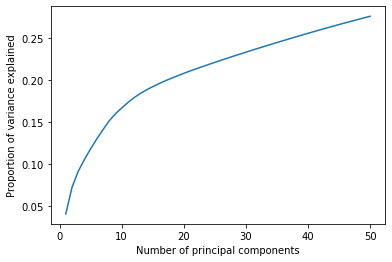

In [7]:
### Your code here
var = 0
var_cum = []
for v in pca.explained_variance_ratio_:
    var += v
    var_cum.append(var)
x = np.arange(1,len(var_cum)+1)
ax = sns.lineplot(x = x,y = var_cum)
ax.set_xlabel('Number of principal components')
ax.set_ylabel('Proportion of variance explained')
print(f"The total variance in the dataset is explained by the first 20 principal components is {var_cum[19]:0.4f}")

**For the first principal component, report the top 10 loadings (weights) and their corresponding gene names.** In other words, which 10 genes are weighted the most in the first principal component?

In [8]:
### Your code here
print('\n'.join([f'{gene}: {w:0.4f}' for gene, w in 
                 sorted(zip(cell_gene_counts_df.columns,pca.components_[0]),key = lambda x:np.abs(x[1]),reverse = True)[:10]]))

Nsg2: 0.0267
St8sia3: 0.0266
Ptpn5: 0.0266
Kcnj4: 0.0265
Rasgef1a: 0.0263
Camkv: 0.0262
Hpca: 0.0262
Cpne5: 0.0260
Nrsn2: 0.0260
Erc2: 0.0259


**Plot the projection of the data onto the first two principal components using a scatter plot.**

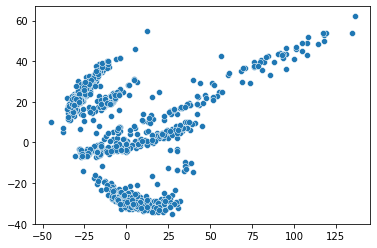

In [9]:
### Your code here
sns.scatterplot(x = cell_gene_counts_pca_df[:,0],y = cell_gene_counts_pca_df[:,1]);

**Now, use a small multiple of four scatter plots to make the same plot as above, but colored by four annotations in the metadata: cell_ontology_class, subtissue, mouse.sex, mouse.id. Include a legend for the labels.** For example, one of the plots should have points projected onto PC 1 and PC 2, colored by their cell_ontology_class.

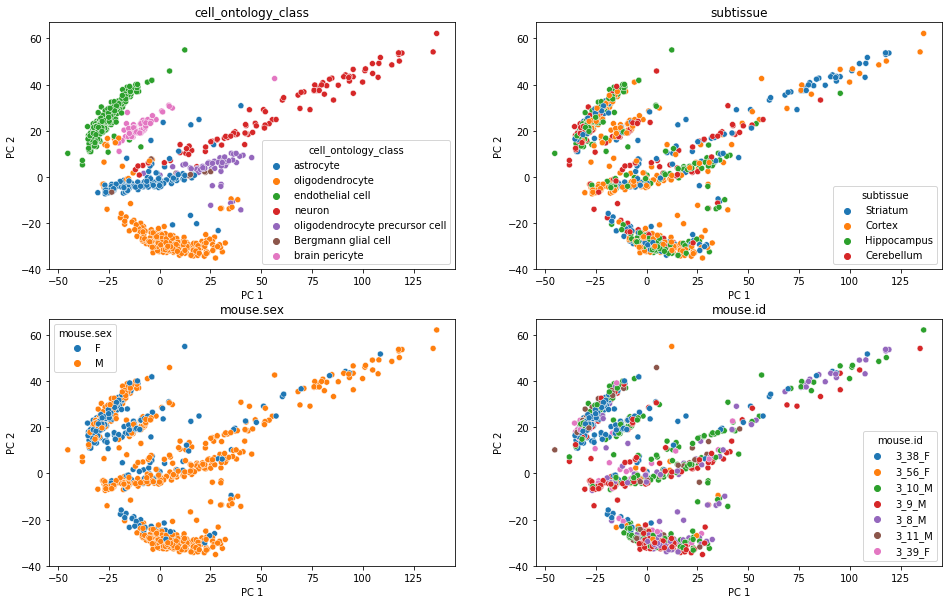

In [10]:
### Your code here
cell_gene_counts_pca_df = pd.DataFrame(cell_gene_counts_pca_df)
cell_gene_meta_pca_df = cell_gene_counts_pca_df.join(cell_metadata_df[['cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id']])
fig, ax = plt.subplots(2,2,figsize = (16,10))
sns.scatterplot(x = cell_gene_meta_pca_df[0],y = cell_gene_meta_pca_df[1],hue = cell_gene_meta_pca_df['cell_ontology_class'],ax = ax[0,0])
ax[0,0].set_title('cell_ontology_class')
ax[0,0].set_xlabel('PC 1')
ax[0,0].set_ylabel('PC 2')
sns.scatterplot(x = cell_gene_meta_pca_df[0],y = cell_gene_meta_pca_df[1],hue = cell_gene_meta_pca_df['subtissue'],ax = ax[0,1])
ax[0,1].set_title('subtissue')
ax[0,1].set_xlabel('PC 1')
ax[0,1].set_ylabel('PC 2')
sns.scatterplot(x = cell_gene_meta_pca_df[0],y = cell_gene_meta_pca_df[1],hue = cell_gene_meta_pca_df['mouse.sex'],ax = ax[1,0])
ax[1,0].set_title('mouse.sex')
ax[1,0].set_xlabel('PC 1')
ax[1,0].set_ylabel('PC 2')
sns.scatterplot(x = cell_gene_meta_pca_df[0],y = cell_gene_meta_pca_df[1],hue = cell_gene_meta_pca_df['mouse.id'],ax = ax[1,1])
ax[1,1].set_title('mouse.id')
ax[1,1].set_xlabel('PC 1')
ax[1,1].set_ylabel('PC 2');

**Based on the plots above, the first two principal components correspond to which aspect of the cells? What is the intrinsic dimension that they are describing?**

In [11]:
### Your answer here
"""
I think it mainly correspond to the cell ontology class, since the classes are distinguished well.
"""


'\nI think it mainly correspond to the cell ontology class, since the classes are distinguished well.\n'

## Part 2: K-means

While the annotations provide high-level information on cell type (e.g. cell_ontology_class has 7 categories), we may also be interested in finding more granular subtypes of cells. To achieve this, we will use K-means clustering to find a large number of clusters in the gene expression dataset. Note that the original gene expression matrix had over 18,000 noisy features, which is not ideal for clustering. So, we will perform K-means clustering on the first 20 principal components of the dataset.

**Implement a `kmeans` function which takes in a dataset `X` and a number of clusters `k`, and returns the cluster assignment for each point in `X`. You may NOT use sklearn for this implementation. Use lecture 6, slide 14 as a reference.**

In [12]:
def kmeans(X, k, iters=10):
    '''Groups the points in X into k clusters using the K-means algorithm.

    Parameters
    ----------
    X : (m x n) data matrix
    k: number of clusters
    iters: number of iterations to run k-means loop

    Returns
    -------
    y: (m x 1) cluster assignment for each point in X
    '''
    ### Your code here
    m,n = X.shape
    index = np.random.choice(np.arange(X.shape[0]),k,replace = False)
    core = X[index]
    cluster = [-1]*m
    core_points = {}
    for k in range(iters):
        for i in range(m):
            min_dis = np.infty
            for j in range(len(core)):
                a = X[i]-core[j]
                dis = np.dot(a,a)
                if dis < min_dis:
                    min_dis = dis
                    cluster[i] = j
            if cluster[i] in core_points:
                core_points[cluster[i]].append(X[i])
            else:
                core_points[cluster[i]] = [X[i]]
        # compute new cluster center
        for j in range(len(core)):
            points = core_points[j]
            core[j] = np.average(points,axis=0)
    return cluster
            
    
    

Before applying K-means on the gene expression data, we will test it on the following synthetic dataset to make sure that the implementation is working.

Text(0, 0.5, '$x_2$')

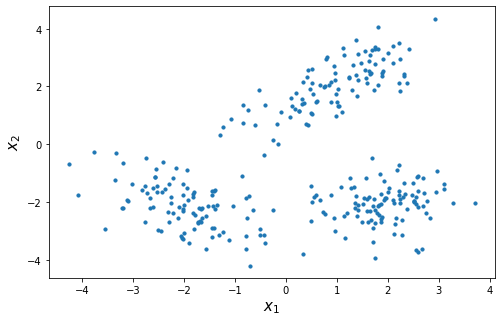

In [13]:
np.random.seed(0)
x_1 = np.random.multivariate_normal(mean=[1, 2], cov=np.array([[0.8, 0.6], [0.6, 0.8]]), size=100)
x_2 = np.random.multivariate_normal(mean=[-2, -2], cov=np.array([[0.8, -0.4], [-0.4, 0.8]]), size=100)
x_3 = np.random.multivariate_normal(mean=[2, -2], cov=np.array([[0.4, 0], [0, 0.4]]), size=100)
X = np.vstack([x_1, x_2, x_3])

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

**Apply K-means with k=3 to the synthetic dataset above. Plot the points colored by their K-means cluster assignments to verify that your implementation is working.**

C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


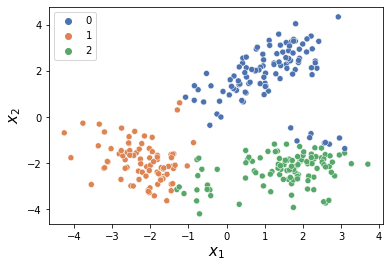

In [14]:
### Your code here
label = kmeans(X, k=3, iters=10)
sns.scatterplot(X[:, 0], X[:, 1], hue = label, palette="deep")
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15);

**Use K-means with k=20 to cluster the first 20 principal components of the gene expression data.**

In [15]:
### Your code here
label = kmeans(cell_gene_counts_pca_df.iloc[:,:20].to_numpy(), k=20, iters=10)

## Part 3: t-SNE

In this final section, we will visualize the data again using t-SNE - a non-linear dimensionality reduction algorithm. You can learn more about t-SNE in this interactive tutorial: https://distill.pub/2016/misread-tsne/.

**Use t-SNE to reduce the first 20 principal components of the gene expression dataset to two dimensions. You may use `sklearn.manifold.TSNE`.** Note that it is recommended to first perform PCA before applying t-SNE to suppress noise and speed up computation.

In [16]:
## Your code here
cell_gene_tsne = TSNE(n_components=2).fit_transform(cell_gene_counts_pca_df.iloc[:,0:20])


**Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions.**

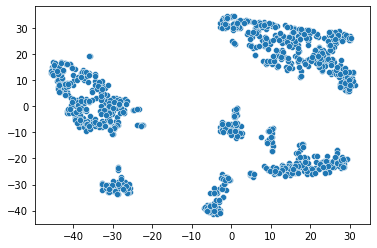

In [17]:
### Your code here
sns.scatterplot(x = cell_gene_tsne[:,0],y = cell_gene_tsne[:,1]);

**Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions, with points colored by their cluster assignments from part 2.**

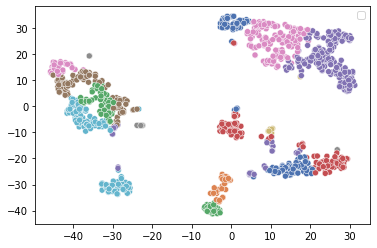

In [18]:
### Your code here
sns.scatterplot(x = cell_gene_tsne[:,0],y = cell_gene_tsne[:,1], hue = label, palette="deep");
plt.legend('');

**Why is there overlap between points in different clusters in the t-SNE plot above?**

In [20]:
### Your answer here
"""
Perhaps it's because we choose too many clusters. According to the scatterplot, there are about seven obvious clusters. 
So if we only set seven clusters, there may be no overlaps.
Besides, we first compress the columns to 50 by PCA, and then choose the first 20 components and compress to 2 dimensions. 
In this process, there must be information loss. So some clusters may be difficult to distinguish.
"""

"\nPerhaps it's because we choose too many clusters. According to the scatterplot, there are about seven obvious clusters. \nSo if we only set seven clusters, there may be no overlaps.\nBesides, we first compress the columns to 50 by PCA, and then choose the first 20 components and compress to 2 dimensions. \nIn this process, there must be information loss. So some clusters may be difficult to distinguish.\n"

These 20 clusters may correspond to various cell subtypes or cell states. They can be further investigated and mapped to known cell types based on their gene expressions (e.g. using the K-means cluster centers). The clusters may also be used in downstream analysis. For instance, we can monitor how the clusters evolve and interact with each other over time in response to a treatment.